Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
orders = pd.read_csv(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\data\processed\cleaned_orders.csv")
user_features = pd.read_csv(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\data\processed\user_features.csv")
product_features = pd.read_csv(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\data\processed\product_features.csv")

Explore Data Structure

In [3]:
print(f"=== بررسی ساختار داده‌ها ===")
print(f"سفارشات (Orders):")
print(orders.info())
print(f"\nویژگی‌های کاربر (User Features):")
print(user_features.info())
print(f"\nویژگی‌های محصول (Product Features):")
print(product_features.info())

=== بررسی ساختار داده‌ها ===
سفارشات (Orders):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column      Dtype
---  ------      -----
 0   order_id    int64
 1   user_id     int64
 2   product_id  int64
 3   reordered   int64
dtypes: int64(4)
memory usage: 989.8 MB
None

ویژگی‌های کاربر (User Features):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  206209 non-null  int64  
 1   total_orders             206209 non-null  int64  
 2   avg_days_between_orders  206209 non-null  float64
 3   total_products_ordered   206209 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 6.3 MB
None

ویژگی‌های محصول (Product Features):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49677 entries, 0 to 49676
Data columns (

Summary Statistics

In [4]:
print(f"\n=== خلاصه آماری سفارشات ===")
print(orders.describe())

print(f"\n=== خلاصه آماری ویژگی‌های کاربر ===")
print(user_features.describe())

print(f"\n=== خلاصه آماری ویژگی‌های محصول ===")
print(product_features.describe())


=== خلاصه آماری سفارشات ===
           order_id       user_id    product_id     reordered
count  3.243449e+07  3.243449e+07  3.243449e+07  3.243449e+07
mean   1.710749e+06  1.029372e+05  2.557634e+04  5.896975e-01
std    9.873007e+05  5.946648e+04  1.409669e+04  4.918886e-01
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
25%    8.559430e+05  5.142100e+04  1.353000e+04  0.000000e+00
50%    1.711048e+06  1.026110e+05  2.525600e+04  1.000000e+00
75%    2.565514e+06  1.543910e+05  3.793500e+04  1.000000e+00
max    3.421083e+06  2.062090e+05  4.968800e+04  1.000000e+00

=== خلاصه آماری ویژگی‌های کاربر ===
             user_id   total_orders  avg_days_between_orders  \
count  206209.000000  206209.000000            206209.000000   
mean   103105.000000      15.590367                15.469670   
std     59527.555167      16.654774                 7.207436   
min         1.000000       3.000000                 0.000000   
25%     51553.000000       5.000000                 9.55

Missing Values

In [5]:
print(f"\n=== بررسی مقادیر گمشده ===")
print(f"مقادیر گمشده در سفارشات:")
print(orders.isnull().sum())

print(f"\nمقادیر گمشده در ویژگی‌های کاربر:")
print(user_features.isnull().sum())

print(f"\nمقادیر گمشده در ویژگی‌های محصول:")
print(product_features.isnull().sum())


=== بررسی مقادیر گمشده ===
مقادیر گمشده در سفارشات:
order_id      0
user_id       0
product_id    0
reordered     0
dtype: int64

مقادیر گمشده در ویژگی‌های کاربر:
user_id                    0
total_orders               0
avg_days_between_orders    0
total_products_ordered     0
dtype: int64

مقادیر گمشده در ویژگی‌های محصول:
product_id      0
order_count     0
reorder_rate    0
dtype: int64


Distribution Analysis

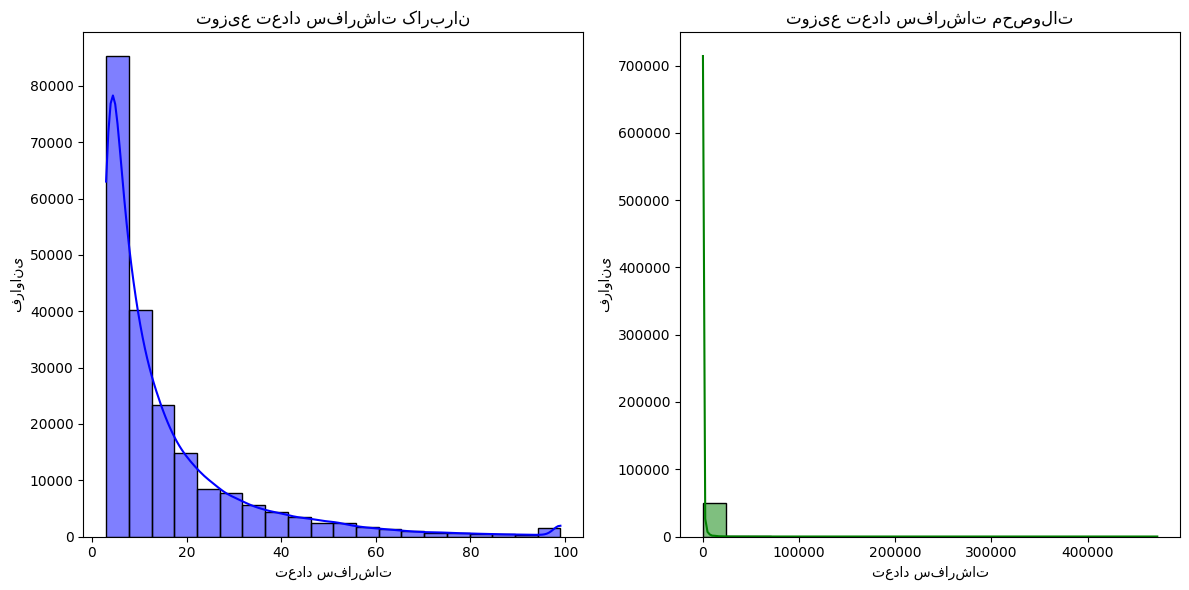

In [6]:
# تحلیل توزیع داده‌ها
plt.figure(figsize=(12, 6))

# توزیع تعداد سفارشات کاربران
plt.subplot(1, 2, 1)
sns.histplot(user_features['total_orders'], kde=True, bins=20, color='blue')
plt.title('توزیع تعداد سفارشات کاربران')
plt.xlabel('تعداد سفارشات')
plt.ylabel('فراوانی')

# توزیع تعداد سفارشات محصولات
plt.subplot(1, 2, 2)
sns.histplot(product_features['order_count'], kde=True, bins=20, color='green')
plt.title('توزیع تعداد سفارشات محصولات')
plt.xlabel('تعداد سفارشات')
plt.ylabel('فراوانی')

plt.tight_layout()
plt.show()

Correlation Analysis

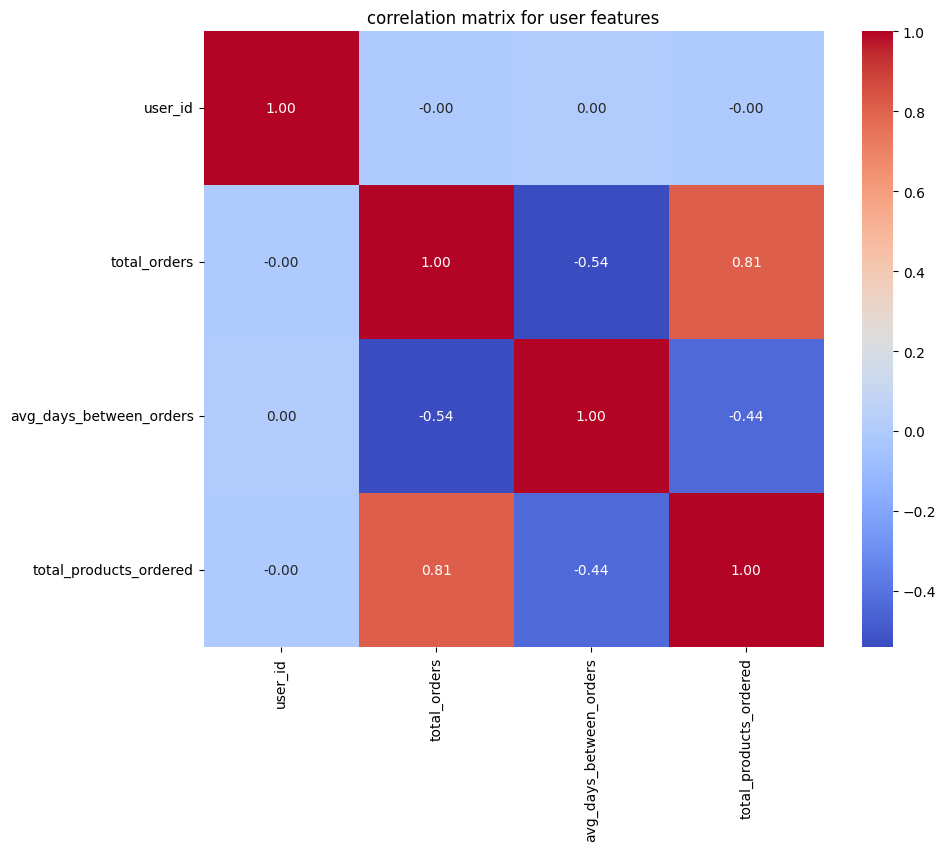

In [10]:
# بررسی همبستگی بین متغیرها
plt.figure(figsize=(10, 8))

# ماتریس همبستگی برای ویژگی‌های کاربر
correlation_matrix = user_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix for user features')
plt.show()

Outlier Detection

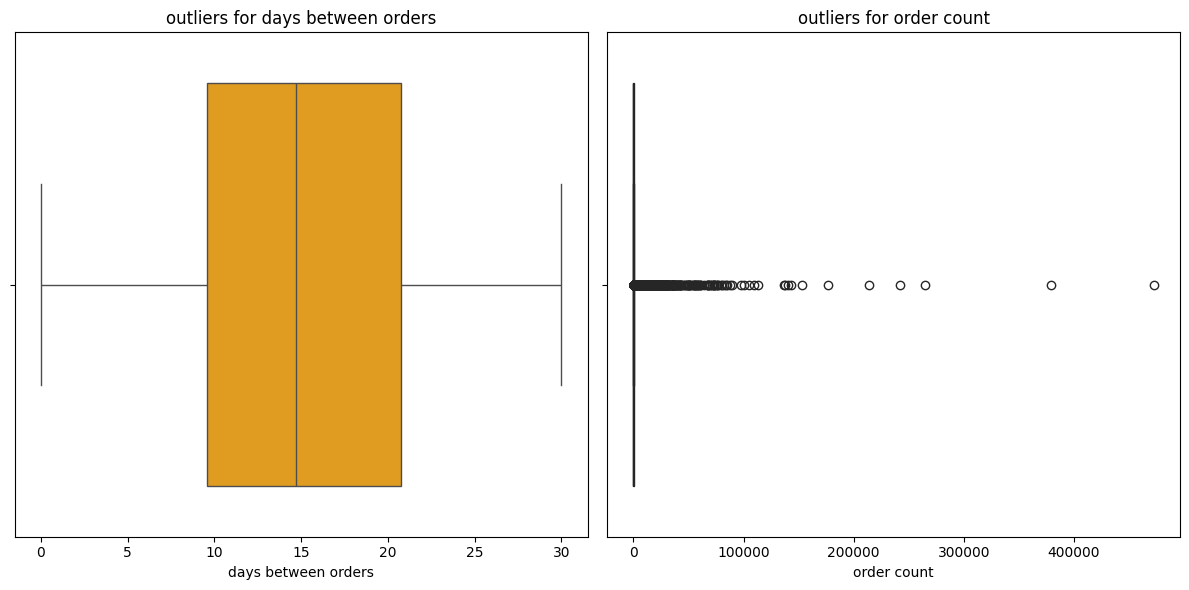

In [13]:
# شناسایی داده‌های پرت
plt.figure(figsize=(12, 6))

# Boxplot برای فاصله زمانی بین سفارشات
plt.subplot(1, 2, 1)
sns.boxplot(x=user_features['avg_days_between_orders'], color='orange')
plt.title('outliers for days between orders')
plt.xlabel('days between orders')

# Boxplot برای تعداد سفارشات محصولات
plt.subplot(1, 2, 2)
sns.boxplot(x=product_features['order_count'], color='purple')
plt.title('outliers for order count')
plt.xlabel('order count')

plt.tight_layout()
plt.show()